In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [10]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [13]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

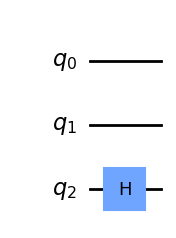

In [2]:
qc = QuantumCircuit(3)

qc.h(2)
qc.draw()

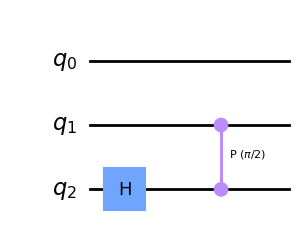

In [3]:
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw()

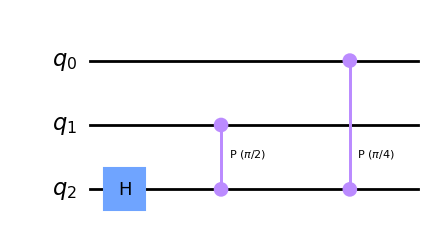

In [4]:
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.draw()

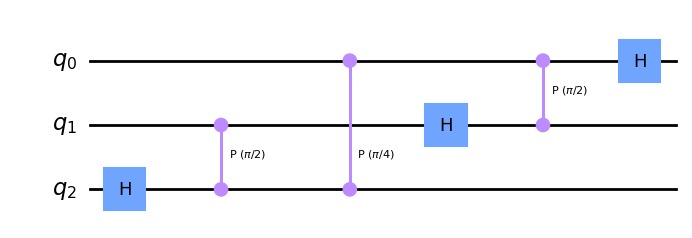

In [5]:
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw()

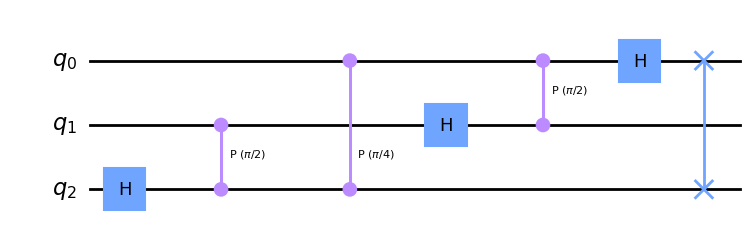

In [6]:
qc.swap(0,2)
qc.draw()

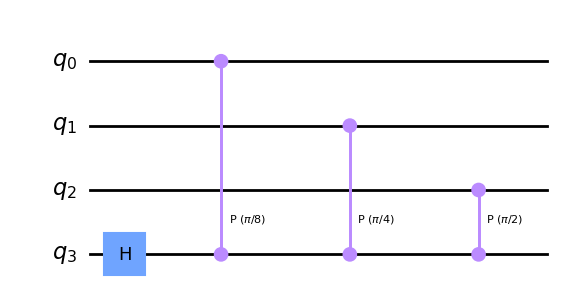

In [8]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

In [9]:
# for one qubits to transform

from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xc1\x00\x00\x01o\x08\x06\x00\x00\x00\xabO\x16w\x…

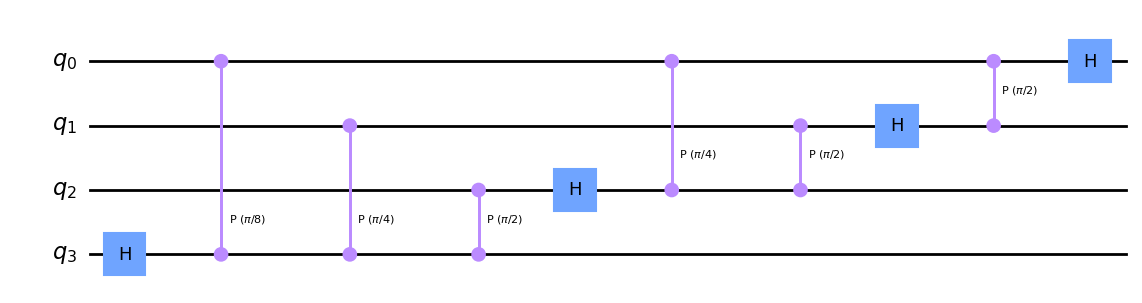

In [11]:
# Quantum Fourier Transform on 4 qubits
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

In [12]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb2\x00\x00\x01o\x08\x06\x00\x00\x00\x9f\n=o\x00…

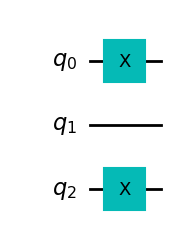

In [15]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw()

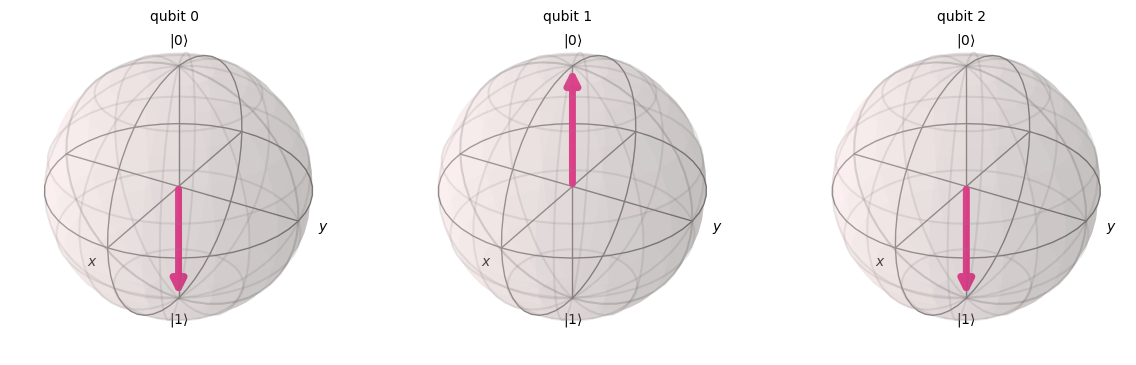

In [16]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

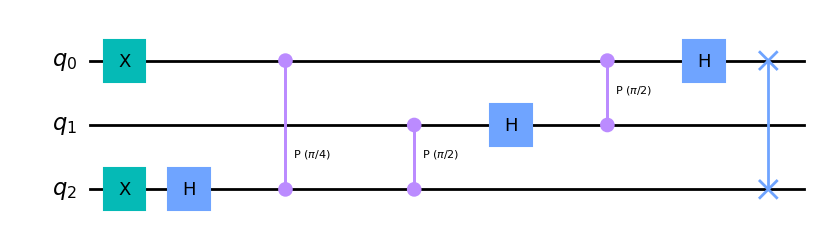

In [17]:
qft(qc,3)
qc.draw()

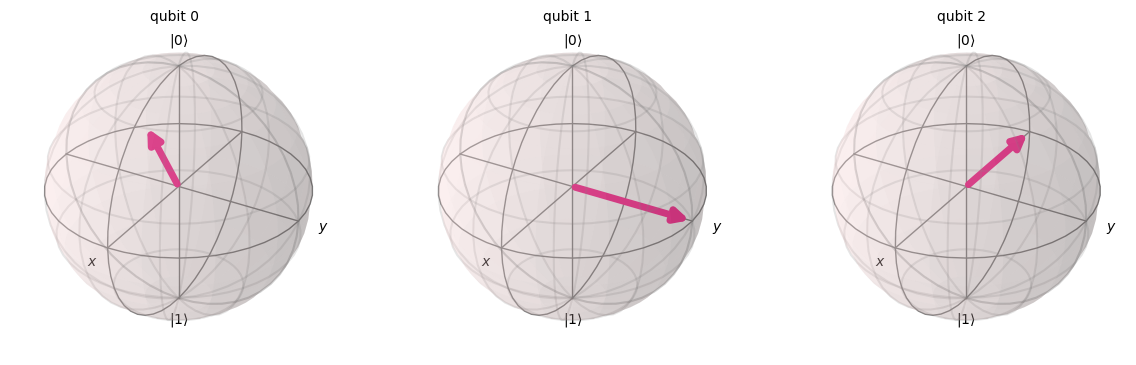

In [18]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)